# **KAGGLE DATA SCIENCE COURSE "INTRODUCTION TO DEEP LEARNING"**


---




# DAY-1: 9/10/22

Creating linear model using keras. (refer linear model from notes)

---

We could define a linear model accepting three input features ('sugars', 'fiber', and 'protein') and producing a single output ('calories') like so:

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
#linear model -> Keras.Sequential()

model = keras.Sequential([
    layers.Dense(units = 1,input_shape=[3])
    #units = how many output variables we need, so here its 1
    #input_shape = how many input variables we need, so here its 3keras
])

Internally, Keras represents the weights of a neural network with tensors. Tensors are basically TensorFlow's version of a Numpy array with a few differences that make them better suited to deep learning. One of the most important is that tensors are compatible with GPU and TPU) accelerators. TPUs, in fact, are designed specifically for tensor computations.

---

A model's weights are kept in its weights attribute as a list of tensors. Get the weights of the model you defined above. (If you want, you could display the weights with something like: print("Weights\n{}\n\nBias\n{}".format(w, b))).

In [ ]:
#weights: 
w,b = model.weights
#print("Weights\n{}\n\nBias\n{}".format(w,b));
w

<tf.Variable 'dense/kernel:0' shape=(3, 1) dtype=float32, numpy=
array([[0.22610676],
       [0.05490518],
       [0.24346912]], dtype=float32)>

In [ ]:
b

<tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>

*When you set the input_shape argument, you are telling Keras the dimensions of the array it should expect for each example in the training data. Setting input_shape=[3] would create a network accepting vectors of length 3, like [0.2, 0.4, 0.6].)*



---



---



# **DAY-2: 10/10/22**

**DEEP NEURAL NETWORKS: (REFER NOTES ON ACTIVATION FUNCTIONS)**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

**A model with two hidden layers and a output layer, while taking in two input variables. (refer notes for diagram Fig F1)**

In [ ]:
model = keras.Sequential([
    layers.Dense(units = 4,input_shape=[2],activation='relu'),#Hidden reLU layer
    layers.Dense(units = 3,activation = 'relu'),  #Hidden reLU layer
    layers.Dense(units=1),  #Output layer
])

The usual way of attaching an activation function to a Dense layer is to include it as part of the definition with the activation argument. Sometimes though you'll want to put some other layer between the Dense layer and its activation function.

In this case, we can define the activation in its own Activation layer, like so:


*layers.Dense(units=8),*

*layers.Activation('relu')*

This is completely equivalent to the ordinary way:


layers.Dense(units=8, activation='relu').

In [ ]:
#EXAMPLE MODEL:
model = keras.Sequential([
    layers.Dense(32, input_shape=[8]),
    layers.Activation('relu'),
    layers.Dense(32),
    layers.Activation('relu'),
    layers.Dense(1),
])



---

There is a whole family of variants of the 'relu' activation -- 'elu', 'selu', and 'swish', among others -- all of which you can use in Keras. Sometimes one activation will perform better than another on a given task, so you could consider experimenting with activations as you develop a model. The ReLU activation tends to do well on most problems, so it's a good one to start with.

---



In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
# YOUR CODE HERE: Change 'relu' to 'elu', 'selu', 'swish'... or something else
activation_layer = layers.Activation('elu')

x = tf.linspace(-3.0, 3.0, 100)
y = activation_layer(x) # once created, a layer is callable just like a function

plt.figure(dpi=100)
plt.plot(x, y)
plt.xlim(-3, 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()



---



---



# DAY - 3: 11/10/22

# STOCHASTIC GRADIANT DESCENT
(refer notes on loss function and optimizer)

After defining a model, you can add a loss and optimizer with the model's 'compile' method:

In [ ]:
model.compile(
    optimizer="adam",
    loss = "mae",
)

OPTIONAL CODE NOW OPTIMIZING THE DATA BEFORE MODELLING:

One thing you might note for now though is that we've rescaled each feature to lie in the interval  [0,1] .

In [ ]:
import pandas as pd
from IPython.display import display

red_wine = pd.read_csv('../input/dl-course-data/red-wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

We've chosen a three-layer network with over 1500 neurons. This network should be capable of learning fairly complex relationships in the data.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

After defining the model, we compile in the optimizer and loss function.

In [ ]:
model.compile(
    optimizer='adam',
    loss='mae',
)

We've told Keras to feed the optimizer 256 rows of the training data at a time (the batch_size) and to do that 10 times all the way through the dataset (the epochs).

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=10,
)

You can see that Keras will keep you updated on the loss as the model trains.

Often, a better way to view the loss though is to plot it. The fit method in fact keeps a record of the loss produced during training in a History object. We'll convert the data to a Pandas dataframe, which makes the plotting easy.

In [ ]:
import pandas as pd

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();

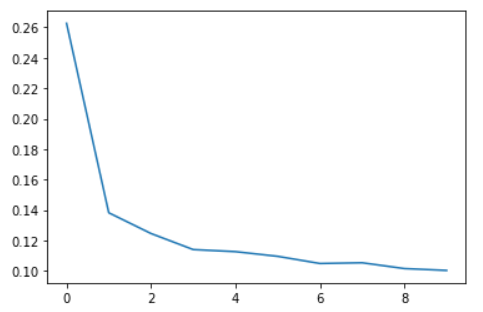



---



---



# **DAY-4: 12/10/22** OVERFITTING AND UNDERFITTING
(refer notes on capacity and early stopping)

**CAPACITY EXAMPLE:**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(1),
])

wider = keras.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(1),
])

deeper = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1),
])

**EARLY STOPPING EXAMPLE:**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

**An example using early stopping and Capacity on Dataset:**

In [ ]:
import pandas as pd
from IPython.display import display

red_wine = pd.read_csv('../input/dl-course-data/red-wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

Now let's increase the capacity of the network. We'll go for a fairly large network, but rely on the callback to halt the training once the validation loss shows signs of increasing.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])
model.compile(
    optimizer='adam',
    loss='mae',
)

After defining the callback, add it as an argument in fit

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=0,  # turn off training log
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

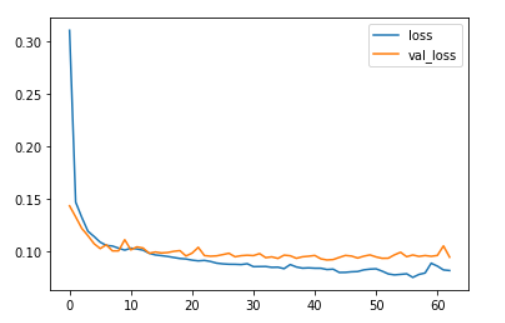



---



---



# **DAY - 5: 15/10/22**

# **Different types of keras layers:**


---
(refer dropout and batch normalization from notes)


Example of dropout:

In [ ]:
keras.Sequential([
    # ...
    layers.Dropout(rate=0.3), # apply 30% dropout to the next layer
    layers.Dense(16),
    # ...
])

Ways to add Batch normalization Layer

You can put it After an layer:

In [ ]:
layers.Dense(16, activation='relu'),
layers.BatchNormalization(),

... or between a layer and its activation function:

In [ ]:
layers.Dense(16),
layers.BatchNormalization(),
layers.Activation('relu'),

And if you add it as the first layer of your network it can act as a kind of adaptive preprocessor, standing in for something like Sci-Kit Learn's StandardScaler.

---



# **DAY - 6: 11/10/22**

# Binary Classification

(refer notes on cross entropy and sigmoid function)

We'll define our model just like we did for the regression tasks, with one exception. In the final layer include a 'sigmoid' activation so that the model will produce class probabilities.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=[33]),
    layers.Dense(4, activation='relu'),    
    layers.Dense(1, activation='sigmoid'),
])

Add the cross-entropy loss and accuracy metric to the model with its compile method. For two-class problems, be sure to use 'binary' versions. (Problems with more classes will be slightly different.) The Adam optimizer works great for classification too, so we'll stick with it.

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

The model in this particular problem can take quite a few epochs to complete training, so we'll include an early stopping callback for convenience.

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0, # hide the output because we have so many epochs
)

We'll take a look at the learning curves as always, and also inspect the best values for the loss and accuracy we got on the validation set. (Remember that early stopping will restore the weights to those that got these values.)

In [ ]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))

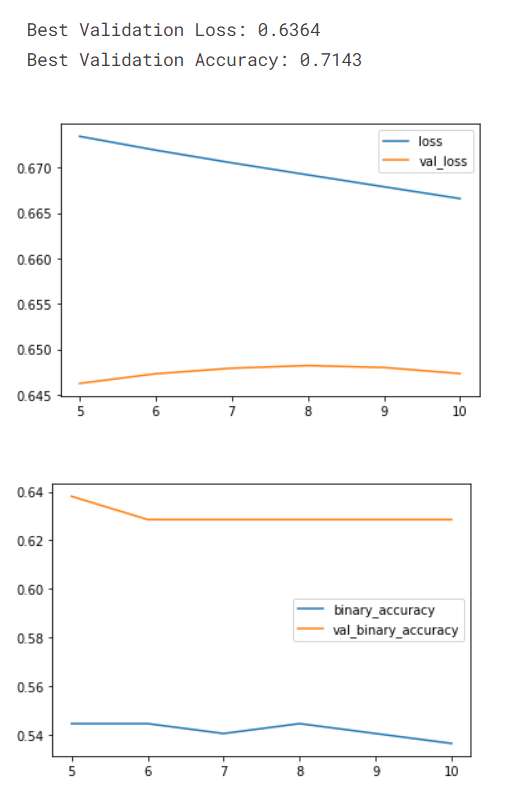